<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,38.842486,0.068066,48.910552,48.875403,0.035148
1,0.0,1.0,28.419590,0.174018,38.593608,38.458205,0.135403
2,0.0,2.0,58.361107,0.127948,68.489056,68.383355,0.105701
3,0.0,3.0,23.315430,-0.241091,33.074339,33.356835,-0.282496
4,0.0,4.0,64.393216,0.040095,74.433311,74.412166,0.021145
...,...,...,...,...,...,...,...
59995,999.0,55.0,61.414663,-0.067370,71.347294,71.423630,-0.076336
59996,999.0,56.0,36.322701,0.265834,46.588536,46.336060,0.252476
59997,999.0,57.0,61.989569,0.105940,72.095509,71.998435,0.097075
59998,999.0,58.0,57.707510,0.027580,67.735090,67.717125,0.017965


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,38.842486,0.068066,48.910552,48.875403,0.035148
1,0.0,1.0,28.419590,0.174018,38.593608,38.458205,0.135403
2,0.0,2.0,58.361107,0.127948,68.489056,68.383355,0.105701
3,0.0,3.0,23.315430,-0.241091,33.074339,33.356835,-0.282496
4,0.0,4.0,64.393216,0.040095,74.433311,74.412166,0.021145
...,...,...,...,...,...,...,...
59995,999.0,55.0,61.414663,-0.067370,71.347294,71.423630,-0.076336
59996,999.0,56.0,36.322701,0.265834,46.588536,46.336060,0.252476
59997,999.0,57.0,61.989569,0.105940,72.095509,71.998435,0.097075
59998,999.0,58.0,57.707510,0.027580,67.735090,67.717125,0.017965


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    38.842486  0.068066  48.910552  48.875403  0.035148
      1.0    28.419590  0.174018  38.593608  38.458205  0.135403
      2.0    58.361107  0.127948  68.489056  68.383355  0.105701
      3.0    23.315430 -0.241091  33.074339  33.356835 -0.282496
      4.0    64.393216  0.040095  74.433311  74.412166  0.021145
...                ...       ...        ...        ...       ...
999.0 55.0   61.414663 -0.067370  71.347294  71.423630 -0.076336
      56.0   36.322701  0.265834  46.588536  46.336060  0.252476
      57.0   61.989569  0.105940  72.095509  71.998435  0.097075
      58.0   57.707510  0.027580  67.735090  67.717125  0.017965
      59.0   30.768175 -0.065512  40.702663  40.782506 -0.079843

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    38.842486  0.068066  48.910552  48.875403  0.035148
      1.0    28.419590  0.174018  38.593608  38.458205  0.135403
      2.0    58.361107  0.127948  68.489056  68.383355  0.105701
      3.0    23.315430 -0.241091  33.074339  33.356835 -0.282496
      4.0    64.393216  0.040095  74.433311  74.412166  0.021145
...                ...       ...        ...        ...       ...
999.0 55.0   61.414663 -0.067370  71.347294  71.423630 -0.076336
      56.0   36.322701  0.265834  46.588536  46.336060  0.252476
      57.0   61.989569  0.105940  72.095509  71.998435  0.097075
      58.0   57.707510  0.027580  67.735090  67.717125  0.017965
      59.0   30.768175 -0.065512  40.702663  40.782506 -0.079843

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,38.842486,0.068066,48.910552,48.875403,0.035148
1,0.0,1.0,28.419590,0.174018,38.593608,38.458205,0.135403
2,0.0,2.0,58.361107,0.127948,68.489056,68.383355,0.105701
3,0.0,3.0,23.315430,-0.241091,33.074339,33.356835,-0.282496
4,0.0,4.0,64.393216,0.040095,74.433311,74.412166,0.021145
...,...,...,...,...,...,...,...
59995,999.0,55.0,61.414663,-0.067370,71.347294,71.423630,-0.076336
59996,999.0,56.0,36.322701,0.265834,46.588536,46.336060,0.252476
59997,999.0,57.0,61.989569,0.105940,72.095509,71.998435,0.097075
59998,999.0,58.0,57.707510,0.027580,67.735090,67.717125,0.017965


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    38.842486  0.068066  48.910552  48.875403  0.035148
      1.0    28.419590  0.174018  38.593608  38.458205  0.135403
      2.0    58.361107  0.127948  68.489056  68.383355  0.105701
      3.0    23.315430 -0.241091  33.074339  33.356835 -0.282496
      4.0    64.393216  0.040095  74.433311  74.412166  0.021145
...                ...       ...        ...        ...       ...
999.0 55.0   61.414663 -0.067370  71.347294  71.423630 -0.076336
      56.0   36.322701  0.265834  46.588536  46.336060  0.252476
      57.0   61.989569  0.105940  72.095509  71.998435  0.097075
      58.0   57.707510  0.027580  67.735090  67.717125  0.017965
      59.0   30.768175 -0.065512  40.702663  40.782506 -0.079843

[60000 rows x 5 columns]

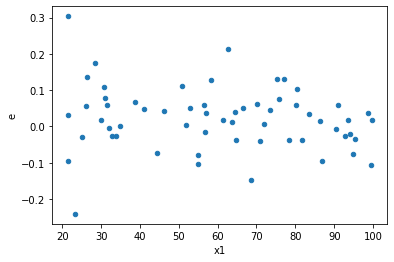

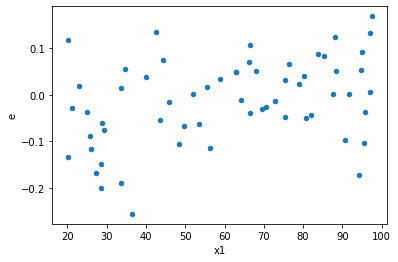

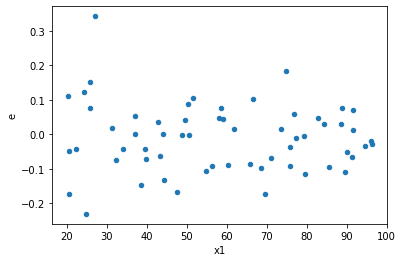

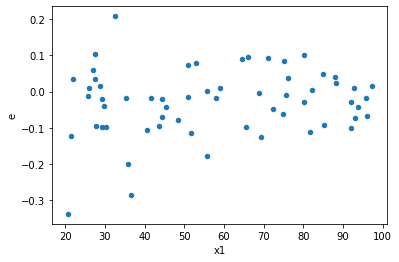

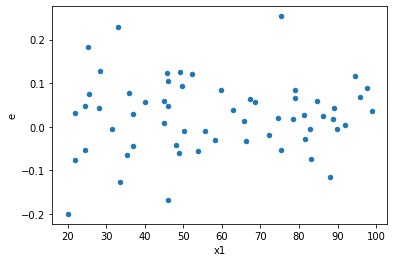

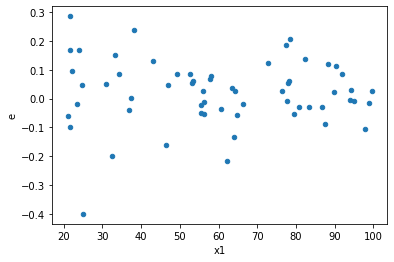

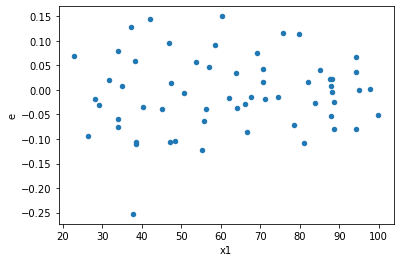

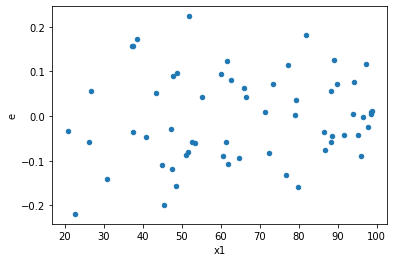

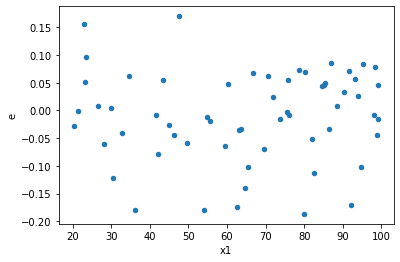

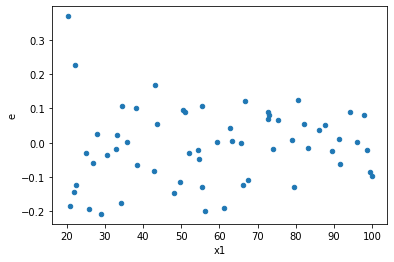

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
48.0,23.0,23.0,0.16368194739958677,0.16484846233015021,0.007116606408677686,0.0071673244491369656,1.0071267170820963,0.9865605828549135,0.5067197085725432,0.4932802914274568,Reject001=1 : Homoscedasticity
346.0,23.0,23.0,0.11980744428441842,0.13060742038604292,0.005209019316713844,0.005678583495045344,1.0901444494215715,0.8378092774228465,0.5810953612885768,0.41890463871142325,Reject001=1 : Homoscedasticity
683.0,23.0,23.0,0.10922695125269326,0.20937229086942263,0.004748997880551881,0.009103143081279245,1.9168555788492727,0.12594840759156445,0.9370257962042178,0.06297420379578222,Reject001=1 : Homoscedasticity
960.0,23.0,23.0,0.13328811194119008,0.1472569814481003,0.005795135301790873,0.00640247745426523,1.1048020660167621,0.8131533888507316,0.5934233055746342,0.4065766944253658,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,0.25299218247147265,0.07754557498663257,0.010999660107455332,0.003371546738549242,0.3065137200252288,0.006336053673768616,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,0.22557268100982594,0.14929189111874974,0.009807507869992432,0.006490951787771728,0.6618349813036384,0.32925590246193914,Reject001=1 : Homoscedasticity
2.0,23.0,23.0,0.33412469249981663,0.1364524851642411,0.014527160543470289,0.005932716746271352,0.4083879109423078,0.036562400509407594,Reject001=1 : Homoscedasticity
3.0,23.0,23.0,0.307160753523999,0.09160600087410016,0.013354815370608652,0.003982869603221746,0.2982347185410939,0.005274956819668943,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,0.24584710743245158,0.11752663105021753,0.010689004670976155,0.005109853523922501,0.4780476462693745,0.08334902668045623,Reject001=1 : Homoscedasticity
5.0,23.0,23.0,0.4939553678865902,0.14352463149885136,0.021476320342895226,0.006240201369515277,0.2905619431021224,0.004419530978812169,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,0.20016150656026357,0.0717069860025087,0.00870267419827233,0.003117695043587335,0.3582456349114236,0.01707910441926123,Reject001=1 : Homoscedasticity
7.0,23.0,23.0,0.33042737036805486,0.15727402098692922,0.014366407407306733,0.006838000912475183,0.4759715298758259,0.08158414604878782,Reject001=1 : Homoscedasticity
8.0,23.0,23.0,0.1661335734471646,0.14115095016556137,0.007223198845528895,0.006136997833285277,0.8496232714241324,0.6992483090197263,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      546
Reject001=0 : Heteroscedasticity    454
Name: Result_test, dtype: int64